In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from imblearn.over_sampling import SMOTE
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score, precision_recall_curve, auc, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [2]:
df = pd.read_csv("Data.csv")

In [3]:
df.head()

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,...,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim
0,ID00001,0.515874,0.05,0.644231,C1,4990,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
1,ID00002,0.672619,0.02,0.375000,C2,27003,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
2,ID00003,0.841110,0.02,0.384615,C3,4076,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
3,ID00004,0.900277,0.11,0.432692,C4,21622,1,C1,M2,Petrol,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0
4,ID00005,0.596403,0.11,0.634615,C5,34738,2,A,M3,Petrol,...,No,Yes,Yes,Yes,No,Yes,Yes,Yes,2,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58592 entries, 0 to 58591
Data columns (total 44 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   policy_id                         58592 non-null  object 
 1   policy_tenure                     58592 non-null  float64
 2   age_of_car                        58592 non-null  float64
 3   age_of_policyholder               58592 non-null  float64
 4   area_cluster                      58592 non-null  object 
 5   population_density                58592 non-null  int64  
 6   make                              58592 non-null  int64  
 7   segment                           58592 non-null  object 
 8   model                             58592 non-null  object 
 9   fuel_type                         58592 non-null  object 
 10  max_torque                        58592 non-null  object 
 11  max_power                         58592 non-null  object 
 12  engi

In [5]:
df.describe()

,policy_tenure,age_of_car,age_of_policyholder,population_density,make,airbags,displacement,cylinder,gear_box,turning_radius,length,width,height,gross_weight,ncap_rating,is_claim
count,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.00000,58592.000000,58592.000000,58592.000000
mean,0.611246,0.069424,0.469420,18826.858667,1.763722,3.137066,1162.355851,3.626963,5.245443,4.852893,3850.476891,1672.233667,1553.33537,1385.276813,1.759950,0.063968
std,0.414156,0.056721,0.122886,17660.174792,1.136988,1.832641,266.304786,0.483616,0.430353,0.228061,311.457119,112.089135,79.62227,212.423085,1.389576,0.244698
min,0.002735,0.000000,0.288462,290.000000,1.000000,1.000000,796.000000,3.000000,5.000000,4.500000,3445.000000,1475.000000,1475.00000,1051.000000,0.000000,0.000000
25%,0.210250,0.020000,0.365385,6112.000000,1.000000,2.000000,796.000000,3.000000,5.000000,4.600000,3445.000000,1515.000000,1475.00000,1185.000000,0.000000,0.000000
50%,0.573792,0.060000,0.451923,8794.000000,1.000000,2.000000,1197.000000,4.000000,5.000000,4.800000,3845.000000,1735.000000,1530.00000,1335.000000,2.000000,0.000000
75%,1.039104,0.110000,0.548077,27003.000000,3.000000,6.000000,1493.000000,4.000000,5.000000,5.000000,3995.000000,1755.000000,1635.00000,1510.000000,3.000000,0.000000
max,1.396641,1.000000,1.000000,73430.000000,5.000000,6.000000,1498.000000,4.000000,6.000000,5.200000,4300.000000,1811.000000,1825.00000,1720.000000,5.000000,1.000000


In [6]:
df.isnull().sum()

policy_id                           0
policy_tenure                       0
age_of_car                          0
age_of_policyholder                 0
area_cluster                        0
population_density                  0
make                                0
segment                             0
model                               0
fuel_type                           0
max_torque                          0
max_power                           0
engine_type                         0
airbags                             0
is_esc                              0
is_adjustable_steering              0
is_tpms                             0
is_parking_sensors                  0
is_parking_camera                   0
rear_brakes_type                    0
displacement                        0
cylinder                            0
transmission_type                   0
gear_box                            0
steering_type                       0
turning_radius                      0
length      

In [7]:
df.duplicated().sum()

0

In [8]:
df.columns

Index(['policy_id', 'policy_tenure', 'age_of_car', 'age_of_policyholder',
       'area_cluster', 'population_density', 'make', 'segment', 'model',
       'fuel_type', 'max_torque', 'max_power', 'engine_type', 'airbags',
       'is_esc', 'is_adjustable_steering', 'is_tpms', 'is_parking_sensors',
       'is_parking_camera', 'rear_brakes_type', 'displacement', 'cylinder',
       'transmission_type', 'gear_box', 'steering_type', 'turning_radius',
       'length', 'width', 'height', 'gross_weight', 'is_front_fog_lights',
       'is_rear_window_wiper', 'is_rear_window_washer',
       'is_rear_window_defogger', 'is_brake_assist', 'is_power_door_locks',
       'is_central_locking', 'is_power_steering',
       'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror',
       'is_ecw', 'is_speed_alert', 'ncap_rating', 'is_claim'],
      dtype='object')

In [9]:
catogorical_counts = df['is_claim'].value_counts()
catogorical_counts

is_claim
0    54844
1     3748
Name: count, dtype: int64

In [10]:
catogorical_percentage = (catogorical_counts / catogorical_counts.sum())*100
catogorical_percentage

is_claim
0    93.603222
1     6.396778
Name: count, dtype: float64

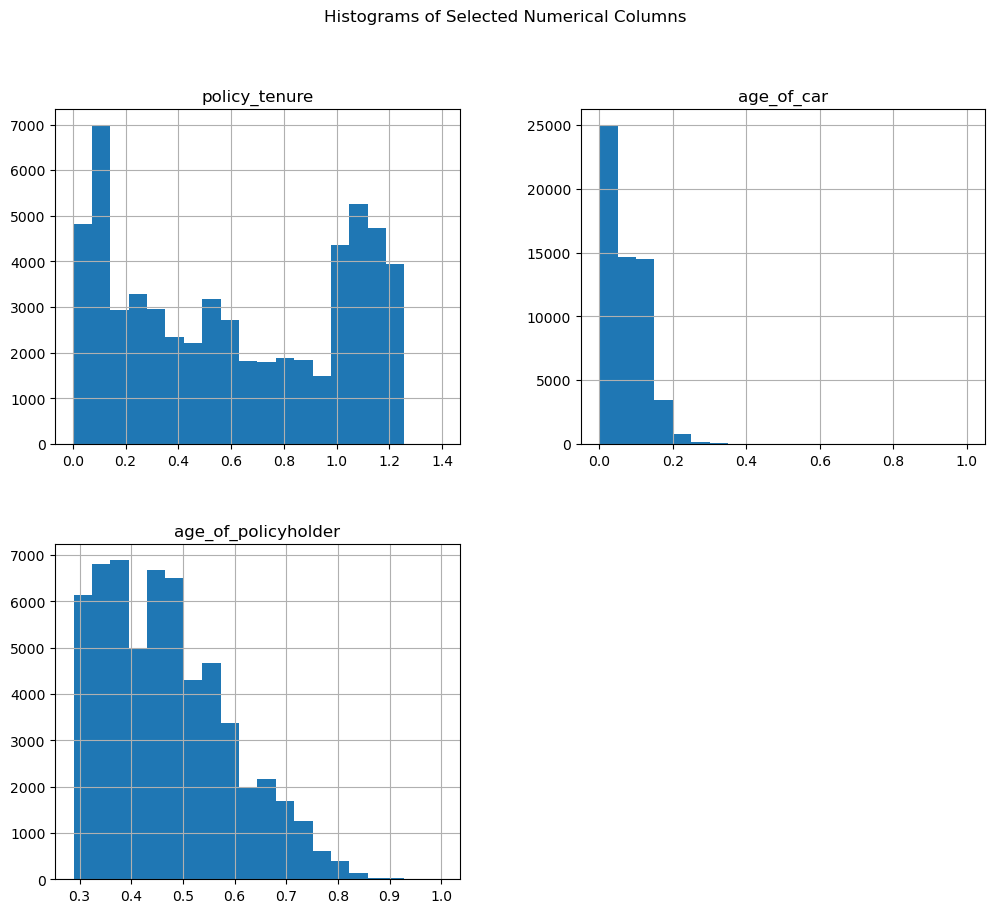

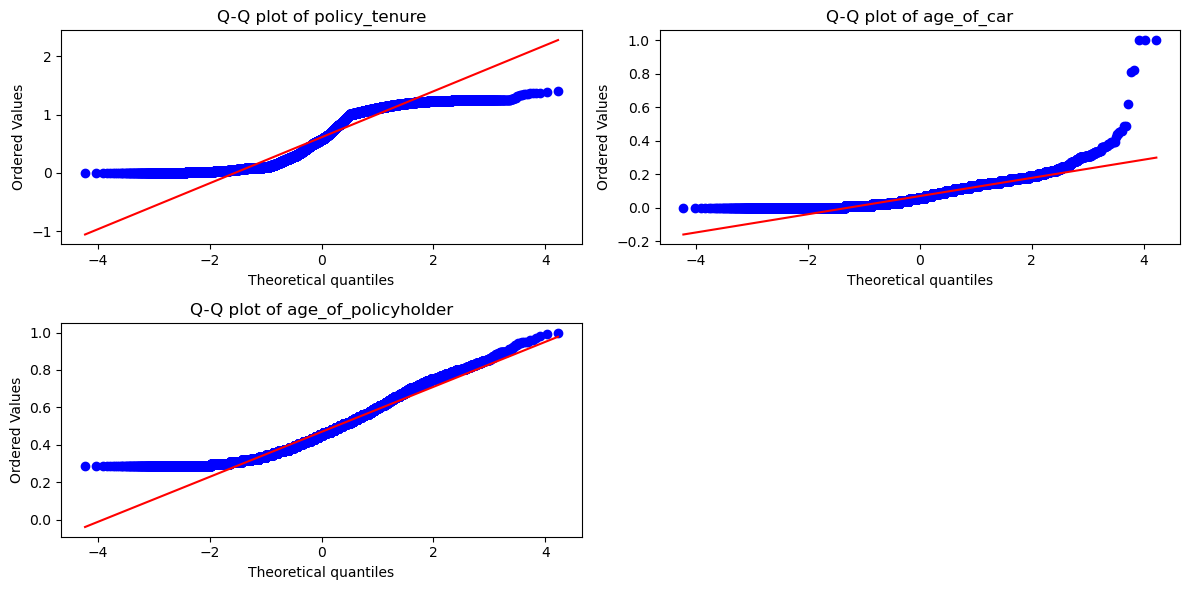

In [11]:
selected_columns = ['policy_tenure', 'age_of_car', 'age_of_policyholder']

df[selected_columns].hist(bins=20, figsize=(12, 10))
plt.suptitle('Histograms of Selected Numerical Columns')
plt.show()

# Q-Q Plots
plt.figure(figsize=(12, 6))
for i, column in enumerate(selected_columns):
    plt.subplot(len(selected_columns) // 2 + 1, 2, i + 1)
    stats.probplot(df[column], dist="norm", plot=plt)
    plt.title(f'Q-Q plot of {column}')
plt.tight_layout()
plt.show()

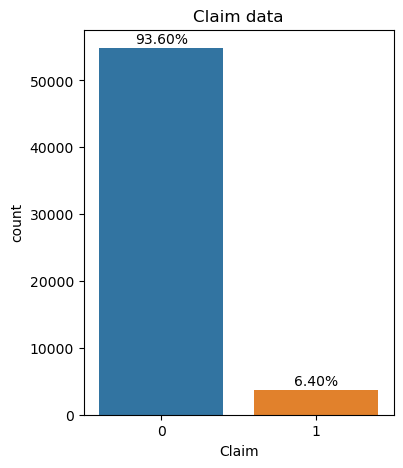

In [12]:
plt.figure(figsize= (4,5))
ax = sns.countplot(x='is_claim', data=df)
total = len(df)
for p in ax.patches:
    height = p.get_height()
    percentage = f'{height/total*100:.2f}%'
    ax.annotate(percentage, (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', xytext=(0, 6), textcoords='offset points')

plt.title("Claim data")
plt.xlabel("Claim")
plt.ylabel("count")
plt.show()

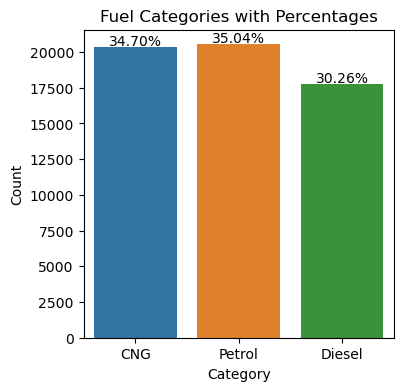

In [13]:
plt.figure(figsize=(4, 4))
ax = sns.countplot(x='fuel_type', data=df)

# Calculate the percentage of each category
total = len(df)
for p in ax.patches:
    height = p.get_height()
    percentage = f'{height/total*100:.2f}%'
    ax.annotate(percentage, (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', xytext=(0, 6), textcoords='offset pixels')

# Add title and labels
plt.title('Fuel Categories with Percentages')
plt.xlabel('Category')
plt.ylabel('Count')

# Show the plot
plt.show()

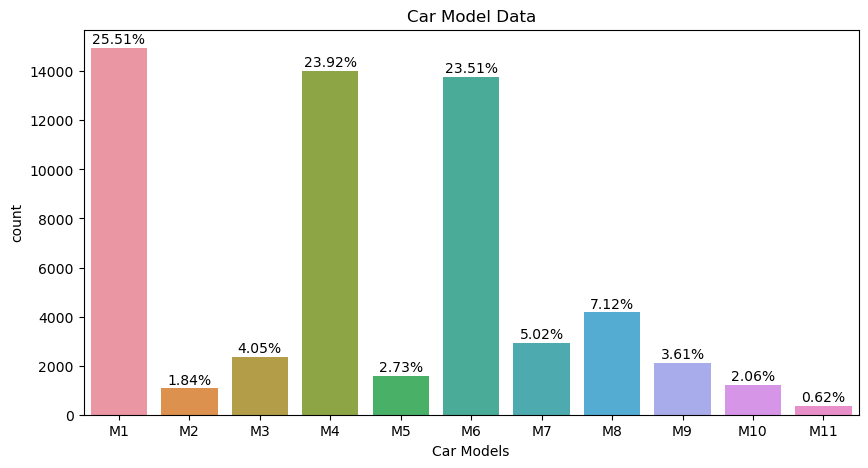

In [14]:
plt.figure(figsize= (10,5))
ax = sns.countplot(x='model', data=df)
total = len(df)
for p in ax.patches:
    height = p.get_height()
    percentage = f'{height/total*100:.2f}%'
    ax.annotate(percentage, (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', xytext=(0, 6), textcoords='offset points')

plt.title("Car Model Data")
plt.xlabel("Car Models")
plt.ylabel("count")
plt.show()

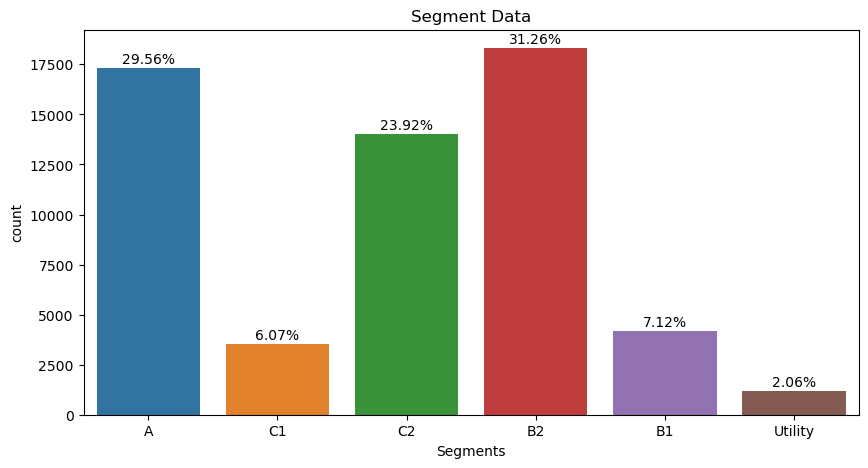

In [15]:
plt.figure(figsize= (10,5))
ax = sns.countplot(x='segment', data=df)
total = len(df)
for p in ax.patches:
    height = p.get_height()
    percentage = f'{height/total*100:.2f}%'
    ax.annotate(percentage, (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', xytext=(0, 6), textcoords='offset points')

plt.title("Segment Data")
plt.xlabel("Segments")
plt.ylabel("count")
plt.show()

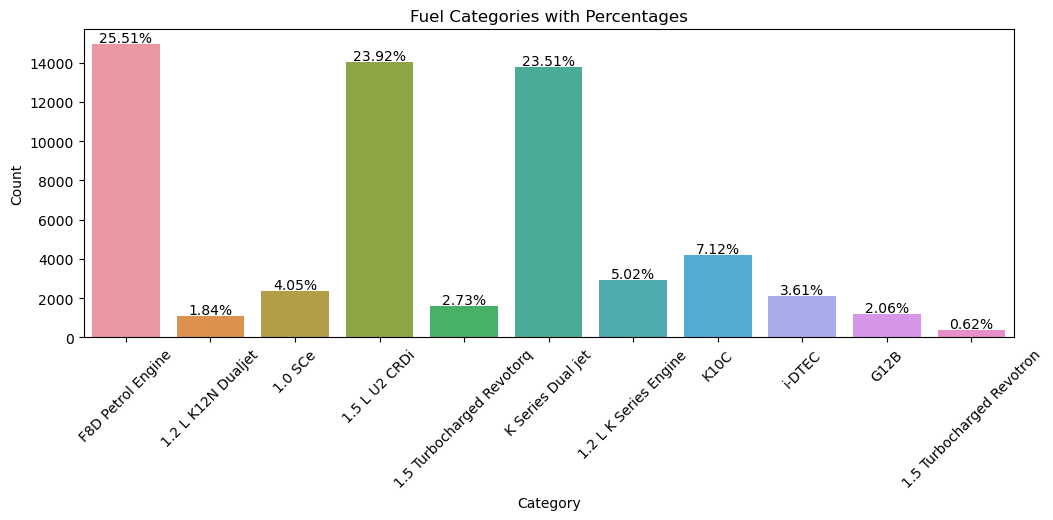

In [16]:
plt.figure(figsize=(12, 4))
ax = sns.countplot(x='engine_type', data=df)

# Calculate the percentage of each category
total = len(df)
for p in ax.patches:
    height = p.get_height()
    percentage = f'{height/total*100:.2f}%'
    ax.annotate(percentage, (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', xytext=(0, 6), textcoords='offset pixels')

# Add title and labels
plt.title('Fuel Categories with Percentages')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
# Show the plot
plt.show()

In [17]:
X = df.drop(columns=['policy_id', 'is_claim'])
y = df['is_claim']

In [18]:
categorical_cols = X.select_dtypes(include=['object']).columns
numerical_cols = X.select_dtypes(exclude=['object']).columns

In [19]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ])

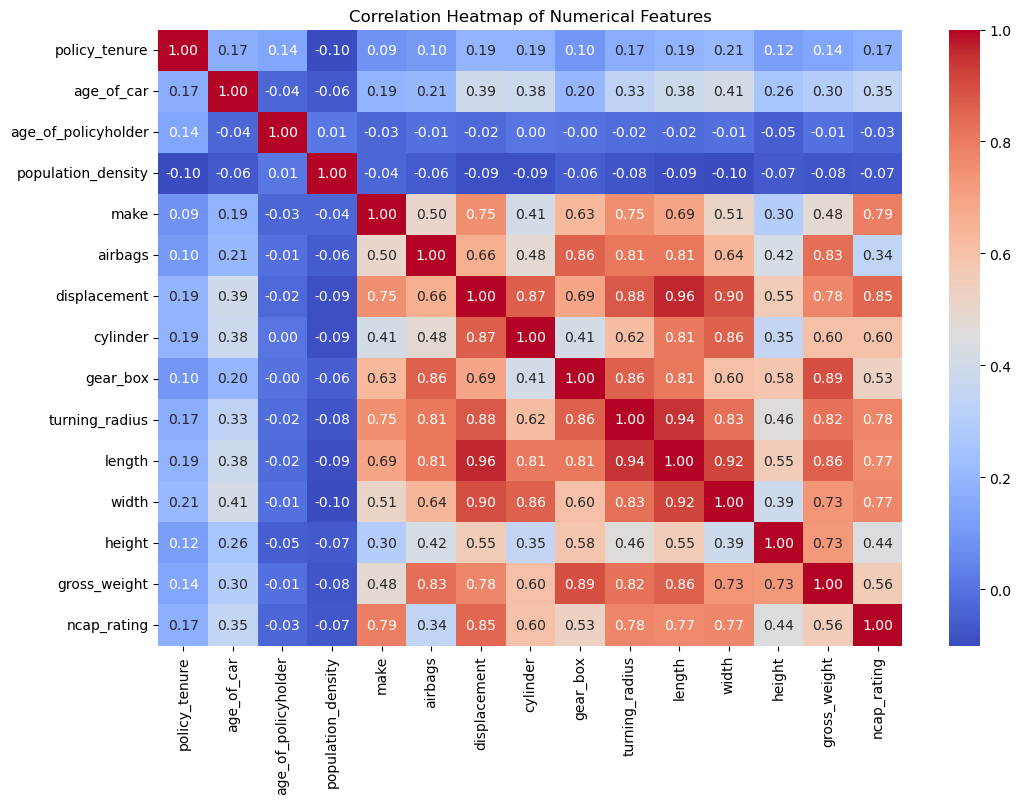

In [20]:
# Correlation heatmap of numerical features
plt.figure(figsize=(12, 8))
correlation_matrix = df[numerical_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

In [23]:
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_transformed, y_train)

Text(0.5, 1.0, 'Class Distribution Before SMOTE')

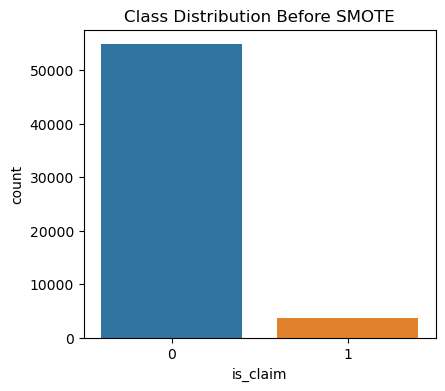

In [24]:
# Class distribution before SMOTE
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
sns.countplot(x=y)
plt.title('Class Distribution Before SMOTE')

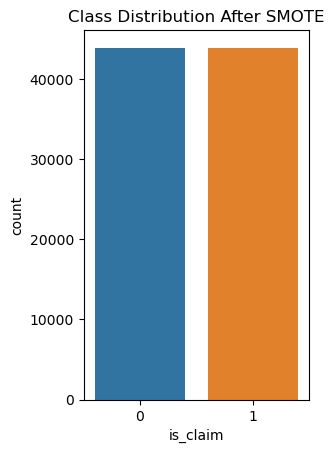

In [25]:
# Class distribution after SMOTE
plt.subplot(1, 2, 2)
sns.countplot(x=y_train_resampled)
plt.title('Class Distribution After SMOTE')
plt.show()

In [26]:
# Initialize the models
logistic_model = LogisticRegression(max_iter=1000, random_state=42)
decision_tree_model = DecisionTreeClassifier(random_state=42)
random_forest_model = RandomForestClassifier(random_state=42)

In [27]:
#Train the models on the resampled data
logistic_model.fit(X_train_resampled, y_train_resampled)

LogisticRegression(max_iter=1000, random_state=42)

In [28]:
decision_tree_model.fit(X_train_resampled, y_train_resampled)

DecisionTreeClassifier(random_state=42)

In [29]:
random_forest_model.fit(X_train_resampled, y_train_resampled)

RandomForestClassifier(random_state=42)

In [30]:
# Make predictions
logistic_preds = logistic_model.predict(X_test_transformed)
decision_tree_preds = decision_tree_model.predict(X_test_transformed)
random_forest_preds = random_forest_model.predict(X_test_transformed)

In [31]:
def plot_confusion_matrix(y_test, preds, title):
    cm = confusion_matrix(y_test, preds, labels=[0, 1])
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Claim', 'Claim'], yticklabels=['No Claim', 'Claim'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.title(title)
    plt.show()

In [32]:
# Confusion matrix 
confusion_matrix(y_test,logistic_preds)

array([[6344, 4619],
       [ 322,  434]], dtype=int64)

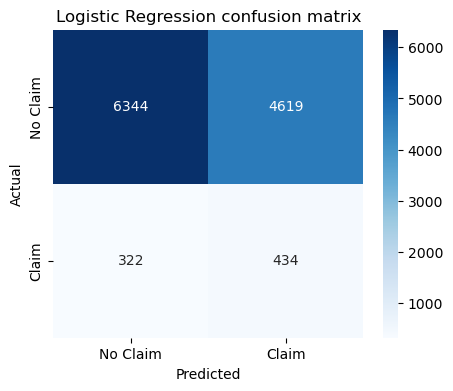

In [33]:
plot_confusion_matrix(y_test, logistic_preds, "Logistic Regression confusion matrix")

In [34]:
confusion_matrix(y_test,decision_tree_preds)

array([[9972,  991],
       [ 661,   95]], dtype=int64)

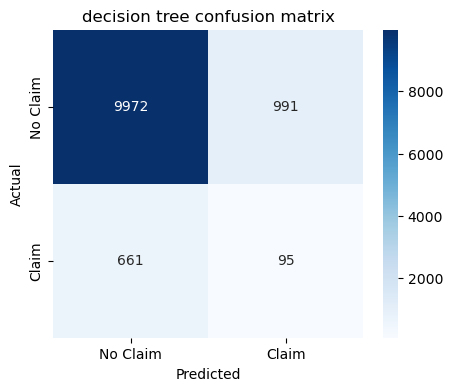

In [35]:
plot_confusion_matrix(y_test, decision_tree_preds, "decision tree confusion matrix")

In [36]:
confusion_matrix(y_test,random_forest_preds)

array([[10038,   925],
       [  667,    89]], dtype=int64)

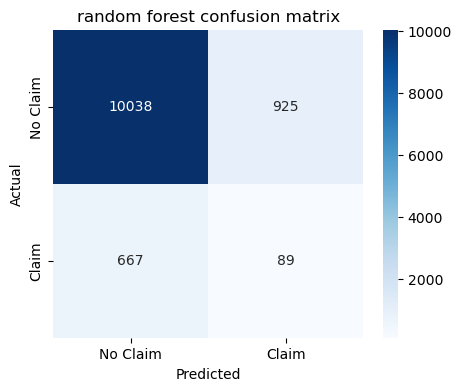

In [37]:
plot_confusion_matrix(y_test, random_forest_preds, "random forest confusion matrix")

In [38]:
# Evaluate the models
logistic_report = classification_report(y_test, logistic_preds)
decision_tree_report = classification_report(y_test, decision_tree_preds)
random_forest_report = classification_report(y_test, random_forest_preds)

In [39]:
print("Logistic Regression Report:\n", logistic_report)
print("Decision Tree Report:\n", decision_tree_report)
print("Random Forest Report:\n", random_forest_report)

Logistic Regression Report:
               precision    recall  f1-score   support

           0       0.95      0.58      0.72     10963
           1       0.09      0.57      0.15       756

    accuracy                           0.58     11719
   macro avg       0.52      0.58      0.43     11719
weighted avg       0.90      0.58      0.68     11719

Decision Tree Report:
               precision    recall  f1-score   support

           0       0.94      0.91      0.92     10963
           1       0.09      0.13      0.10       756

    accuracy                           0.86     11719
   macro avg       0.51      0.52      0.51     11719
weighted avg       0.88      0.86      0.87     11719

Random Forest Report:
               precision    recall  f1-score   support

           0       0.94      0.92      0.93     10963
           1       0.09      0.12      0.10       756

    accuracy                           0.86     11719
   macro avg       0.51      0.52      0.51     11719

In [43]:
# Plot ROC curve for each model
def plot_roc_curve(y_test, preds, model_name):
    fpr, tpr, _ = roc_curve(y_test, preds, pos_label=1)
    roc_auc = roc_auc_score(y_test, preds)
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')

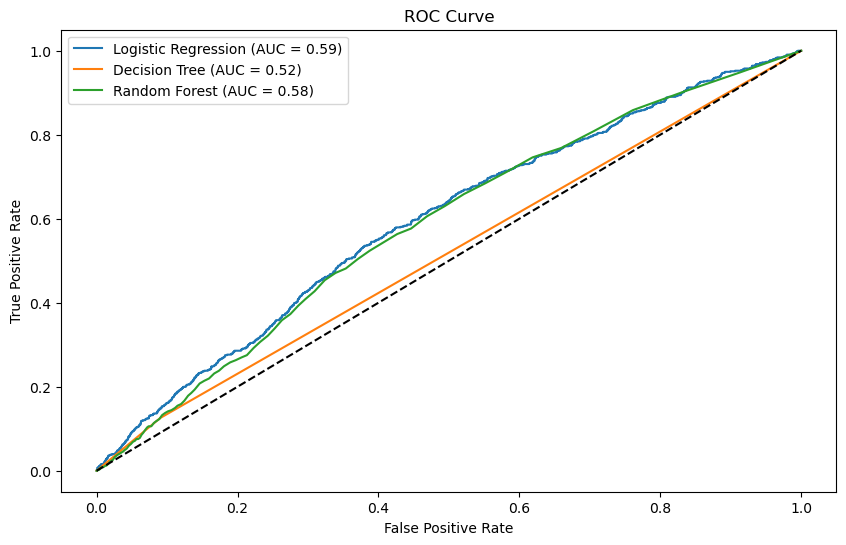

In [44]:
plt.figure(figsize=(10, 6))
plot_roc_curve(y_test, logistic_model.predict_proba(X_test_transformed)[:, 1], 'Logistic Regression')
plot_roc_curve(y_test, decision_tree_model.predict_proba(X_test_transformed)[:, 1], 'Decision Tree')
plot_roc_curve(y_test, random_forest_model.predict_proba(X_test_transformed)[:, 1], 'Random Forest')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

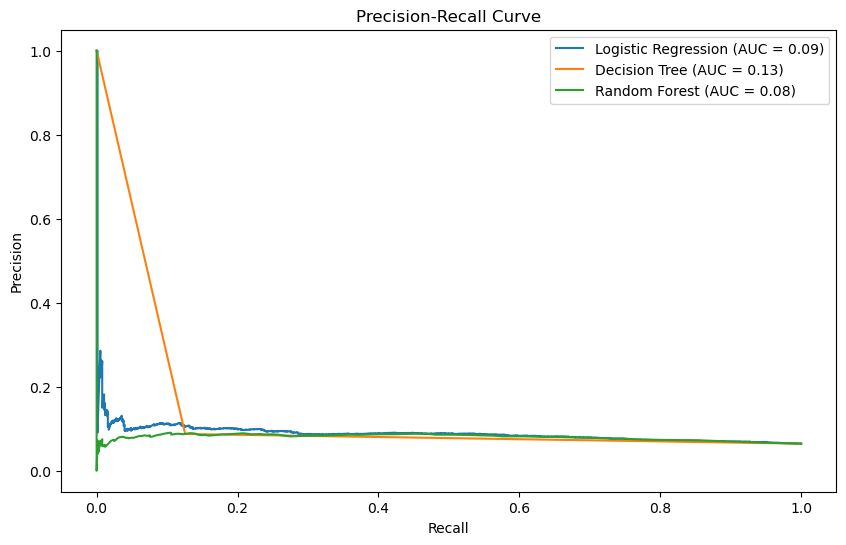

In [45]:
# Plot precision-recall curve for each model
def plot_precision_recall_curve(y_test, preds, model_name):
    precision, recall, _ = precision_recall_curve(y_test, preds, pos_label=1)
    pr_auc = auc(recall, precision)
    plt.plot(recall, precision, label=f'{model_name} (AUC = {pr_auc:.2f})')

plt.figure(figsize=(10, 6))
plot_precision_recall_curve(y_test, logistic_model.predict_proba(X_test_transformed)[:, 1], 'Logistic Regression')
plot_precision_recall_curve(y_test, decision_tree_model.predict_proba(X_test_transformed)[:, 1], 'Decision Tree')
plot_precision_recall_curve(y_test, random_forest_model.predict_proba(X_test_transformed)[:, 1], 'Random Forest')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

In [52]:
def find_best_classification_model(models_predictions, y_true):
    best_model = None
    best_score = 0

    for model_name, y_pred in models_predictions.items():
        score = accuracy_score(y_true, y_pred)
        if score > best_score:
            best_score = score
            best_model = model_name

    return best_model, best_score

In [53]:
models = {
    "logistic Regression " : logistic_preds ,
    "Decision Tree Classifier" : decision_tree_preds ,
    "Random Forest Classifier" : random_forest_preds 
}

In [54]:
# Find the best model for classification
best_model_classification, best_score_classification = find_best_classification_model(models, y_test)
print(f"Best Classification Model: {best_model_classification}")
print(f"Best Accuracy Score: {best_score_classification}")

Best Classification Model: Random Forest Classifier
Best Accuracy Score: 0.864152231419063


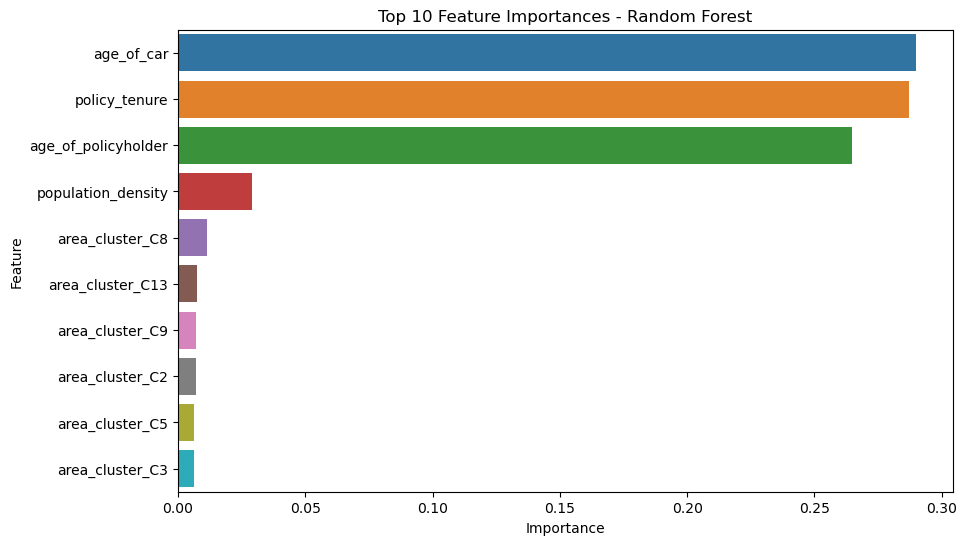

In [64]:
# Feature importance for Random Forest
feature_importances = random_forest_model.feature_importances_
feature_names = preprocessor.transformers_[0][1].get_feature_names_out(numerical_cols).tolist() + \
                preprocessor.transformers_[1][1].get_feature_names_out(categorical_cols).tolist()

# Create a DataFrame for visualization
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False).head(10)  # Top 10 features

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Top 10 Feature Importances - Random Forest')
plt.show()
